# Question 3: Unsupervised Learning
## 90-803 Machine Learning Foundations with Python (Spring 2024)
### Team 17: Yoko, Tessa, Hannah

This notebook attempts to explore question #3 of our project. <br><br>
**Question #3:** Are there any hidden structures or associations between housing prices and climate indicators that is worth exploring?<br>
*Target Variable:* None<br>
*Task:* Unsupervised learning to uncover hidden patterns in the dataset that are valuable for classification/grouping.

## Importing the Relevant Libraries

In [1]:
# common libraries
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# scalers
from sklearn.preprocessing import StandardScaler

# metrics
from sklearn.metrics import silhouette_score

# unsupervised learning (clustering) libraries
from sklearn.cluster import AgglomerativeClustering, KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import scipy as sp
from scipy.cluster.hierarchy import linkage,dendrogram

# PCA libraries
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV 
from yellowbrick.features import PCA as PCA_viz


## Initial Exploration
We will first explore the dataset and pick the appropriate columns for unsurpervised learning.

In [2]:
# read in the dataset
data = pd.read_csv("all_data_geo.csv", index_col=0)
data.head()

,Year,Month,RegionName,State,Bottom-Tier Average Home Value Estimate,Top-Tier Average Home Value Estimate,Average Temperature Value,Anomaly (1901-2000 base period),1901-2000 Mean,Initial Fees and Charges (%),Effective Rate (%),Term to Maturity,Loan Amount ($thou),Purchase Price ($thou),Loan-to-Price Ratio (%),Share of Total Market (%),ALAND,AWATER,INTPTLAT,INTPTLON
0,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,0.93,8.01,15,103.0,173.6,64.7,7.0,10515988166,1785003207,34.196398,-118.261862
1,2000,1,Los Angeles County,CA,122826.545216,400192.738911,52.3,4.5,47.8,0.81,8.20,30,129.9,166.8,81.1,61.1,10515988166,1785003207,34.196398,-118.261862
2,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,0.93,8.01,15,103.0,173.6,64.7,7.0,2447342616,1786339408,41.894294,-87.645455
3,2000,1,Cook County,IL,71689.188026,302264.545103,24.9,2.4,22.5,0.81,8.20,30,129.9,166.8,81.1,61.1,2447342616,1786339408,41.894294,-87.645455
4,2000,1,Harris County,TX,61195.175569,217850.462915,57.4,5.6,51.8,0.93,8.01,15,103.0,173.6,64.7,7.0,4421145870,182187806,29.857273,-95.393037


In [3]:
# we can only do unsupervised learning on certain columns so we need to get the numeric columns we need out and changed "value" to "temperature for more clarity"
unsupervised = data[data.columns.difference(['State', 'RegionName'])]
unsupervised.head(5)

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Month,Purchase Price ($thou),Share of Total Market (%),Term to Maturity,Top-Tier Average Home Value Estimate,Year
0,47.8,10515988166,1785003207,4.5,52.3,122826.545216,8.01,34.196398,-118.261862,0.93,103.0,64.7,1,173.6,7.0,15,400192.738911,2000
1,47.8,10515988166,1785003207,4.5,52.3,122826.545216,8.20,34.196398,-118.261862,0.81,129.9,81.1,1,166.8,61.1,30,400192.738911,2000
2,22.5,2447342616,1786339408,2.4,24.9,71689.188026,8.01,41.894294,-87.645455,0.93,103.0,64.7,1,173.6,7.0,15,302264.545103,2000
3,22.5,2447342616,1786339408,2.4,24.9,71689.188026,8.20,41.894294,-87.645455,0.81,129.9,81.1,1,166.8,61.1,30,302264.545103,2000
4,51.8,4421145870,182187806,5.6,57.4,61195.175569,8.01,29.857273,-95.393037,0.93,103.0,64.7,1,173.6,7.0,15,217850.462915,2000


In [4]:
# double check NaN values one more time
unsupervised.isnull().sum()

1901-2000 Mean                             0
ALAND                                      0
AWATER                                     0
Anomaly (1901-2000 base period)            0
Average Temperature Value                  0
Bottom-Tier Average Home Value Estimate    0
Effective Rate (%)                         0
INTPTLAT                                   0
INTPTLON                                   0
Initial Fees and Charges (%)               0
Loan Amount ($thou)                        0
Loan-to-Price Ratio (%)                    0
Month                                      0
Purchase Price ($thou)                     0
Share of Total Market (%)                  0
Term to Maturity                           0
Top-Tier Average Home Value Estimate       0
Year                                       0
dtype: int64

In [5]:
# shape of the dataset
unsupervised.shape

(579894, 18)

In [6]:
# any scaling necessary? (of course, the answer is yes)
unsupervised.describe()

,1901-2000 Mean,ALAND,AWATER,Anomaly (1901-2000 base period),Average Temperature Value,Bottom-Tier Average Home Value Estimate,Effective Rate (%),INTPTLAT,INTPTLON,Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Month,Purchase Price ($thou),Share of Total Market (%),Term to Maturity,Top-Tier Average Home Value Estimate,Year
count,579894.000000,5.798940e+05,5.798940e+05,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,579894.000000,5.798940e+05,579894.000000
mean,54.317547,2.338742e+09,1.819740e+08,1.385632,55.702485,94103.848741,4.955709,37.986718,-89.613755,0.891515,177.251586,72.512364,6.434317,260.126543,37.364843,22.500000,2.851340e+05,2010.712761
std,17.099949,3.703393e+09,5.523955e+08,3.388082,17.135498,64177.827177,1.232351,4.615860,12.635366,0.365064,36.994047,8.549974,3.466285,36.813915,29.181675,7.500006,2.108634e+05,5.361191
min,1.800000,5.868388e+07,9.251200e+04,-22.200000,-5.200000,6109.396309,2.890000,25.586120,-124.210929,0.180000,60.300000,42.300000,1.000000,124.000000,1.300000,15.000000,5.947229e+04,2000.000000
25%,41.300000,1.055922e+09,1.047176e+07,-0.700000,42.800000,52879.469613,3.980000,34.763109,-94.888456,0.540000,150.900000,67.100000,3.000000,237.700000,7.700000,15.000000,1.884248e+05,2007.000000
50%,55.500000,1.479110e+09,2.694270e+07,1.300000,57.200000,77205.031646,4.650000,38.423084,-86.034263,0.910000,179.800000,74.800000,6.000000,262.500000,32.450000,22.500000,2.347503e+05,2011.000000
75%,68.800000,2.206699e+09,8.116171e+07,3.400000,70.000000,115764.095664,5.960000,41.355319,-81.400955,1.220000,204.400000,80.300000,9.000000,286.100000,65.500000,30.000000,3.139183e+05,2015.000000
max,91.700000,5.197631e+10,1.405367e+10,19.800000,96.200000,915009.312632,8.550000,48.842653,-68.666616,1.510000,254.800000,83.500000,12.000000,347.300000,82.900000,30.000000,5.178158e+06,2019.000000


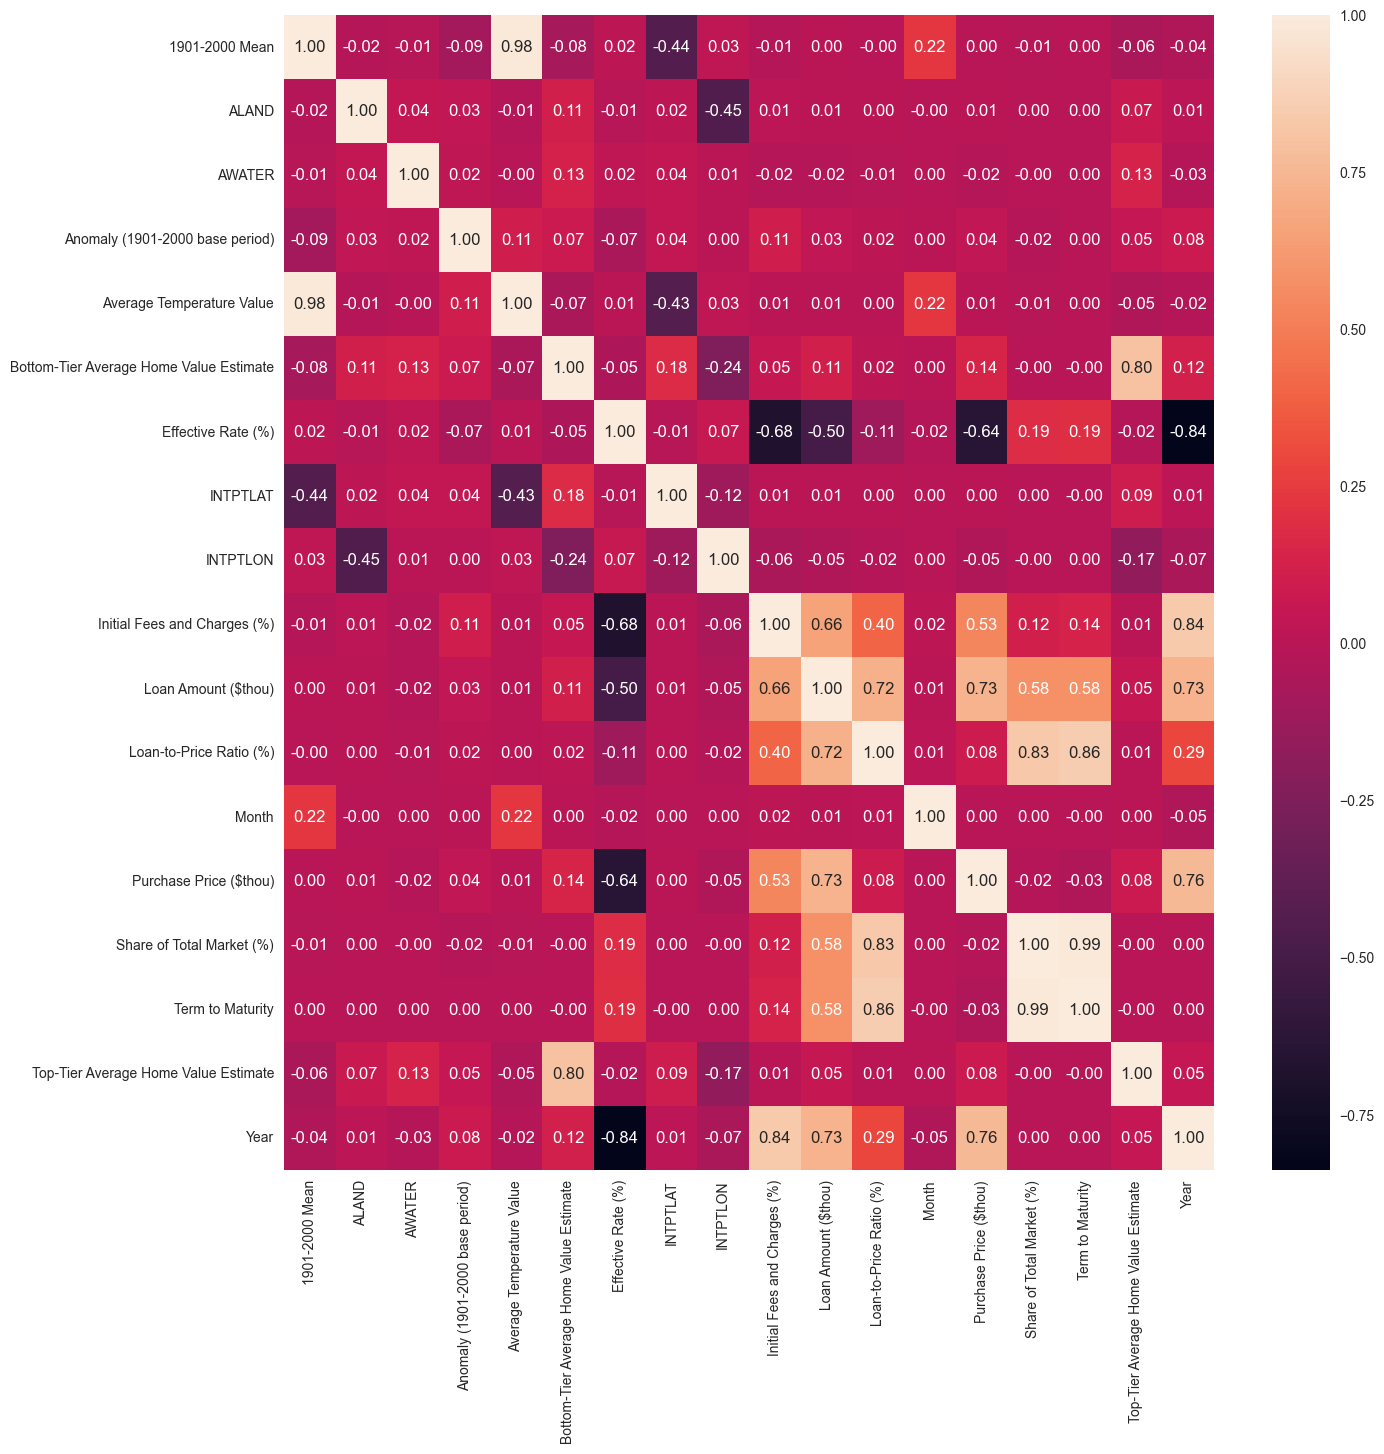

In [11]:
# double check colinearity
plt.figure(figsize=(15,15))
sns.heatmap(unsupervised.corr(), annot=True, fmt=".2f")
plt.show()

We see high correlation between:
 - Initial fees and effective rates
 - Term to Maturity and Share of Total Markets
 - Average temperature and 1901-2000 mean

Based on these observations, I would **drop some more columns** so that 1) we have less data for unsupervised learning to actually run (Hannah's computer crashed trying to run the entire dataset) and 2) the clustering may be due to correlation and the impacts of categorical values such as year, month, and term to maturity so it is not worth our time running them through an unsupervised algorithm (we already know the categories). 
<br> <br>We are also going to **just focus on one year: 2018**. This is because when we were trying out the unsupervised models, it took forever to run (see "Extra 2" below). All the data will be affected by the yearly seasonality anyways, so I think it is okay to focus on the patterns within one year for now.

In [8]:
#focus the data on 2018
unsupervised_focused = unsupervised[unsupervised['Year']==2018]

#dropping columns with high correlations with an existing datatype and dropping categorical data
cols = ['Month', 'Year', 'Term to Maturity', '1901-2000 Mean']
unsupervised_focused = unsupervised_focused.drop(columns=cols)

### Extra 1: A Focused View on Purchase Price
The code below provides a focused view into "Purchase Price ($thou)" which is the target variable for our previous Q.1. It plots purchase price against all other factors and group by Term to Maturity. It is not worth running since it takes quite a bit of time, but it gives some interesting close-up views.

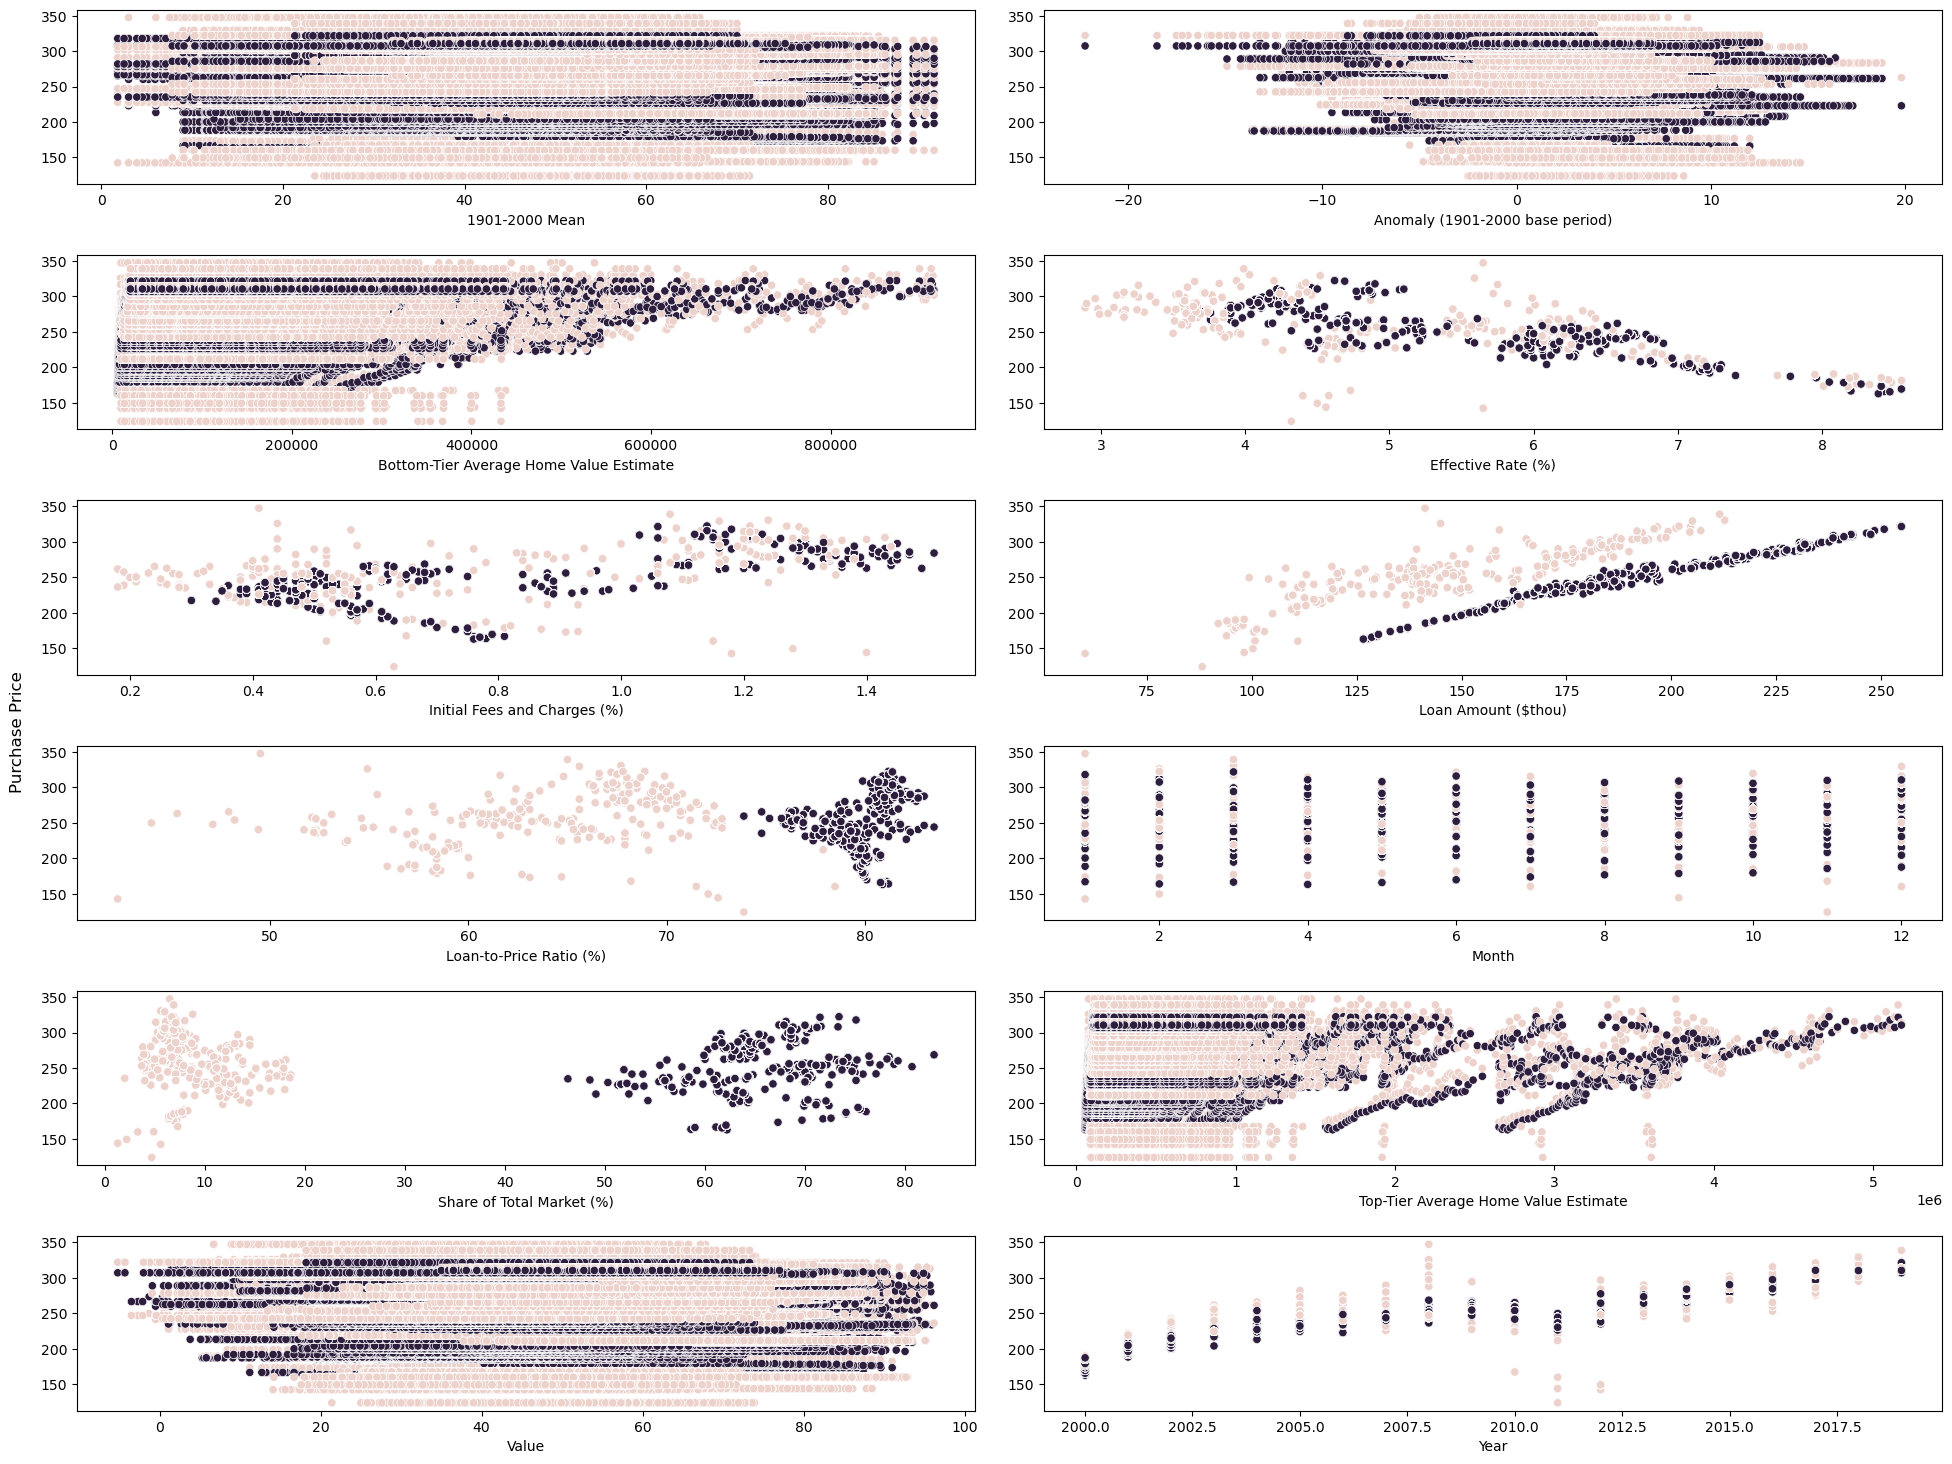

In [9]:
# col = list(unsupervised.columns.difference(['Purchase Price ($thou)', 'Term to Maturity']))

# fig, ax = plt.subplots(6,2, figsize = (20,15))
# fig.supylabel('Purchase Price')
# coor = [(i,k) for i in range(6) for k in range(2)]

# for i in range(len(coor)):
#     sns.scatterplot(data = unsupervised, y = 'Purchase Price ($thou)', x = col[i], ax = ax[coor[i]], hue = 'Term to Maturity', legend=False).set(ylabel = None)

# plt.tight_layout(pad = 2)
# plt.show()

### Extra 2: The problem of run time
I have tried running a hierarchical clustering model and a kmeans clustering model on the dataset without reducing the columns or refocusing on one year, and vs code refused to run, crashed, and unable to produce a result after 16 hours. Therefore, I have decided to completely scale down the dataset, finding patterns without one year and go from there because I do not have enough time for Sprint 4. Below are the records of these failed attempts.

1. **VSCode refused to run:** <br>
This is my first attempt at hierarchical learning with the full dataset. VSCode was unable to run due to a MemoryError.
>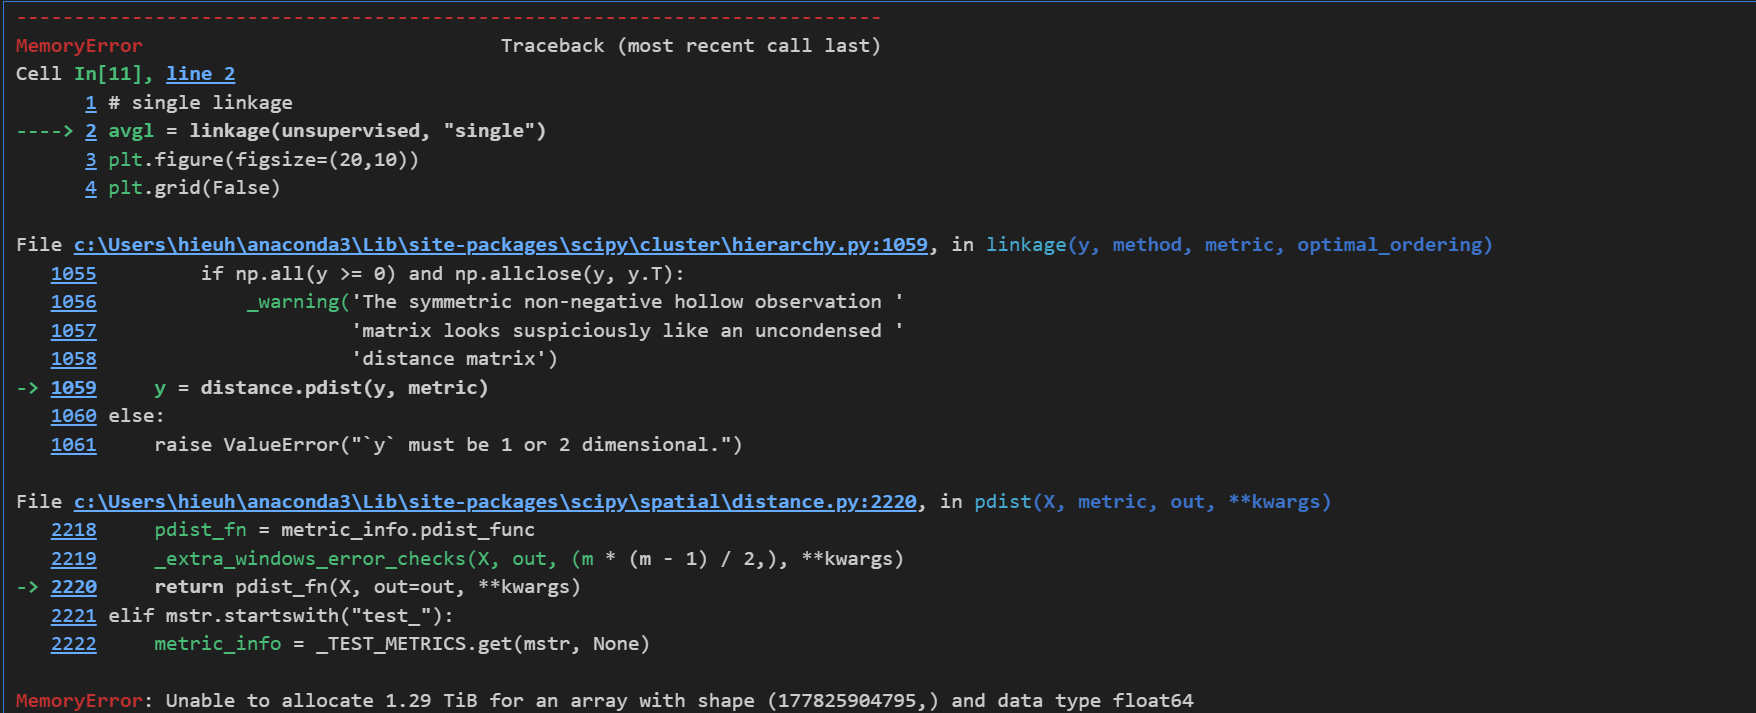
 
2. **VSCode crashed:** <br>
Unfortunately, I don't have a screenshot of my laptop crashing, but I attempted hierarchical learning, only focusing on the year 2018 but with the all columns from unsupervised (not dropping anything), and VSCode crashed after 30 seconds.

3. **16 hours of runtime:** <br>
I then tried a KMean model still with all columns of unsupervised (no dropping colinearity nor categorial values) and not scaling the data down to only one year. The model did not even finish running after 16 hours (1000 minutes).
>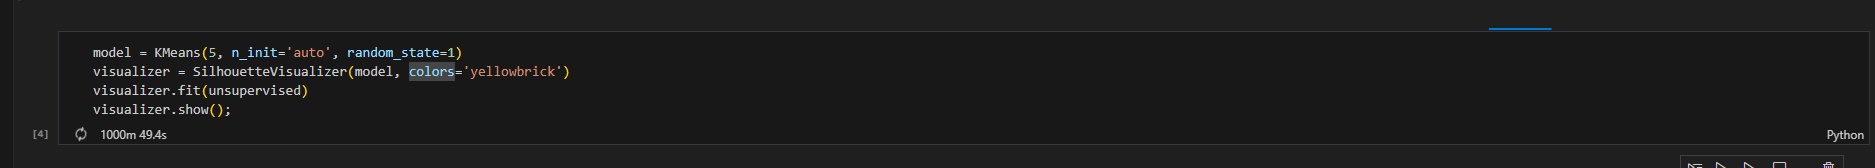

4. **(Fed-up attempt?) Kmeans with dropped columns but full rows:**<br>
Most recently, I tried the KMeans again with dropped columns but without scaling the dataset to only one year. I also change max interation from 300 default to only 200 to avoid long wait-time, but ultimately stopped the model at 17 minutes. I need to submit this for sprint 4 so I decided to not wait in futile.
>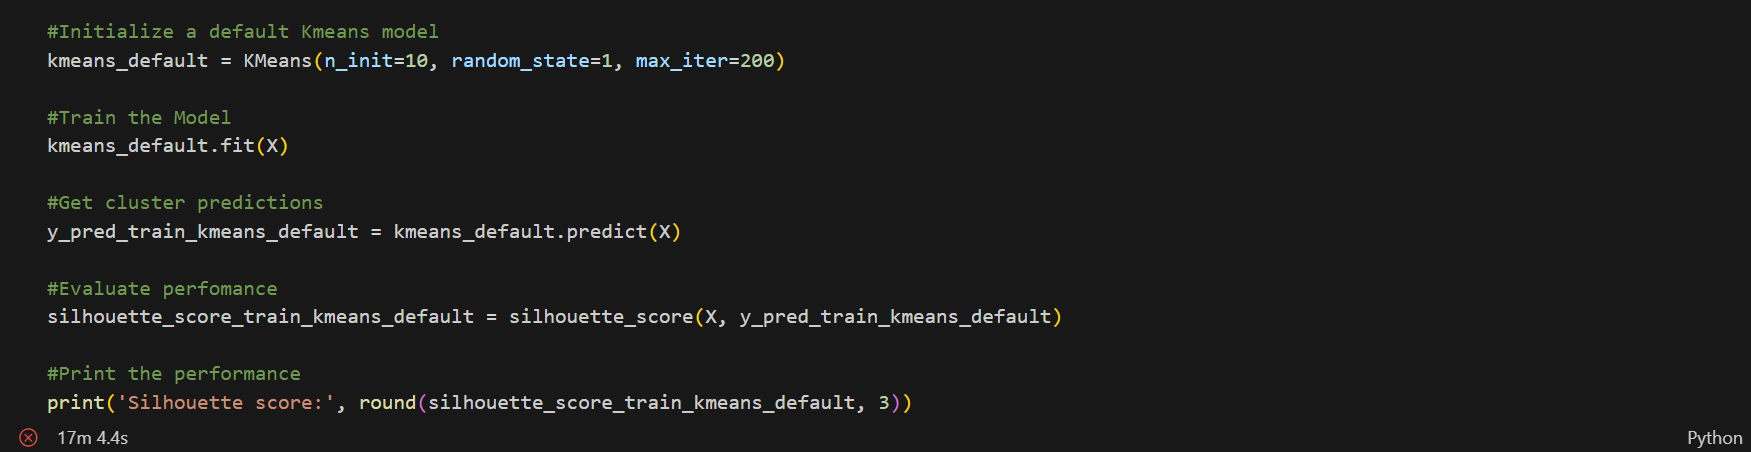

In conclusion, due to these frustrations in wait-time, I decided to scale down the dataset. I want to stress that I am not throwing away data recklessly but quite carefully picking out which columns to drop and why. The run-time for a default KMeans model where I dropped some columns and only focused on 2018 is a mere 21.3 seconds. I will definitely try to scale up this dataset for sprint 5, but for now, that is good progress to me.

## Scaling the data
As observed in the previous cell, we need to scale our data for appropriate unsupervised learning.

In [10]:
#initalize a scaler
scaler = StandardScaler()

#scale the data
scaled_features = scaler.fit_transform(unsupervised_focused)

# getting a scaled dataframe
X = pd.DataFrame(scaled_features, columns = unsupervised_focused.columns)

#check out the first few rows
X.head()

,Anomaly (1901-2000 base period),Bottom-Tier Average Home Value Estimate,Effective Rate (%),Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Purchase Price ($thou),Share of Total Market (%),Top-Tier Average Home Value Estimate,Average Temperature
0,1.674115,3.205215,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,2.736073,-0.022143
1,1.674115,3.205215,-0.804943,0.818409,0.939012,1.067861,-0.343164,1.085383,2.736073,-0.022143
2,-0.105783,0.062613,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,0.410806,-1.794874
3,-0.105783,0.062613,-0.804943,0.818409,0.939012,1.067861,-0.343164,1.085383,0.410806,-1.794874
4,-1.354369,0.052550,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,0.064424,-0.432087


In [11]:
#double check the amount of data we have
X.shape

(41884, 10)

## Model #1: KMeans Clustering

We will attempt to do a KMeans clustering model, and get the clusters out from our scaled dataset. We will proceed with a random_state = 1 and n_init = 10.

### Train: Default KMeans Model
We will first train a KMeans model by default.

In [12]:
#Initialize a default Kmeans model
kmeans_default = KMeans(n_init=10, random_state=1)

#Train the Model
kmeans_default.fit(X)

#Get cluster predictions
y_pred_train_kmeans = kmeans_default.predict(X)

#Evaluate perfomance
silhouette_score_train_kmeans = silhouette_score(X, y_pred_train_kmeans)

#Print the performance
print('Silhouette score:', round(silhouette_score_train_kmeans, 3))

Silhouette score: 0.289


>0.289 is not bad for a first attempt at such a mangled dataset. I was expecting a much worst result, so I will take 0.289 as a win for now.

### Tuning: Finding the Best K
We will now use three metrics: elbowvisualizer, calinski harabasz, and SilhouetteVisualizer to determine the best cluster number for our KMeans.

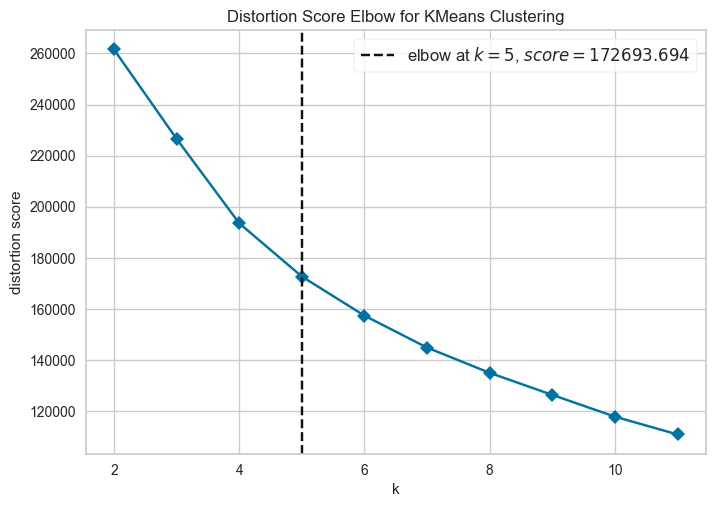

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
#KElbowVisualizer()

#initalizing the model and visualizer
model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

#fitting the data
visualizer.fit(X)

#plotting
visualizer.show()

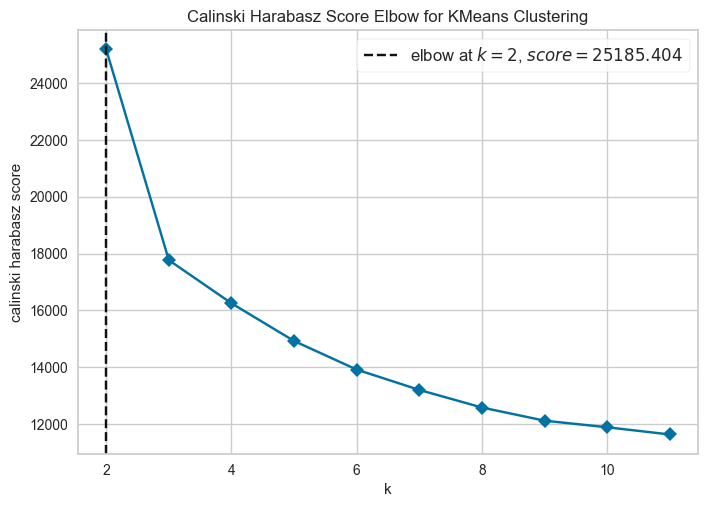

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [19]:
# Calinski Harabasz

#initalizing the model and visualizer
model = KMeans(n_init=10, random_state=1)
visualizer = KElbowVisualizer(model, k=(2,12), metric='calinski_harabasz', timings=False, locate_elbow=True)

#fitting the data
visualizer.fit(X)

#plotting
visualizer.show()

>From the two graphs, I will try both a k=5 and k=2 for my SilhouetteVisualizer().

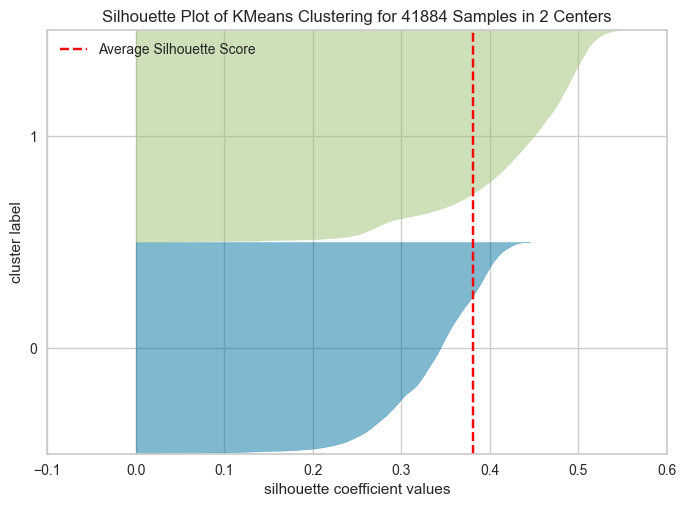

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41884 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [20]:
# SilhouetteVisualizer with k = 2

#initalizing the model and visualizer
model = KMeans(2, n_init=10, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

#fitting the data
visualizer.fit(X) 

#showing the model
visualizer.show()

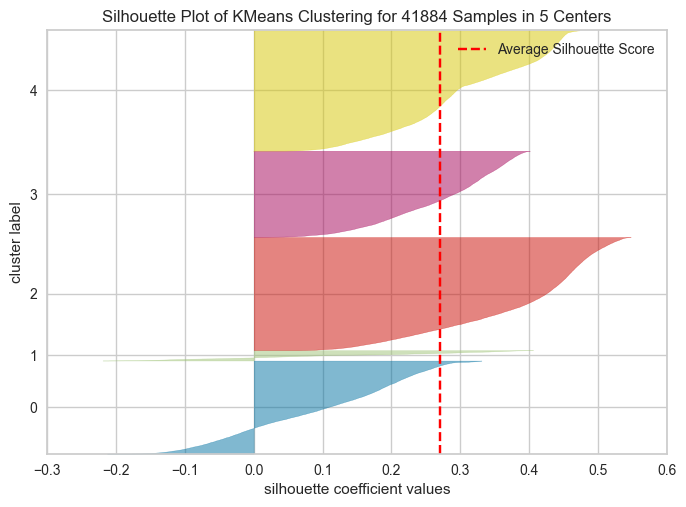

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 41884 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
# SilhouetteVisualizer with k = 5

#initalizing the model and visualizer
model = KMeans(5, n_init=10, random_state=1)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

#fitting the data
visualizer.fit(X) 

#showing the model
visualizer.show()

The graphs show that with k = 2, our clusters are very accurate. We think the top-tier/bottom-tier values play a big role in dictating this pattern, but for now, it is still interesting to see!

### Best KMeans: Training the Final KMean Model
We finally have our best KMeans model with k = 2.

In [25]:
# final KMeans model

#Initialize a default Kmeans model
kmeans_best = KMeans(2, n_init=10, random_state=1)

#Train the Model
kmeans_best.fit(X)

#Get cluster predictions
y_pred_test_kmeans = kmeans_best.predict(X)

#Evaluate perfomance
silhouette_score_test_kmeans = silhouette_score(X, y_pred_test_kmeans)

#Print the performance
print('Silhouette score:', round(silhouette_score_test_kmeans, 3))

Silhouette score: 0.381


### Visualized the Clusters for KMeans
We will extract the labels and visualize the results.

In [26]:
# creating a results dataframe with labels
X_results = X.copy()

X_results["labels_kmeans"] = y_pred_test_kmeans
X_results.head()

,Anomaly (1901-2000 base period),Bottom-Tier Average Home Value Estimate,Effective Rate (%),Initial Fees and Charges (%),Loan Amount ($thou),Loan-to-Price Ratio (%),Purchase Price ($thou),Share of Total Market (%),Top-Tier Average Home Value Estimate,Average Temperature,labels_kmeans
0,1.674115,3.205215,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,2.736073,-0.022143,0
1,1.674115,3.205215,-0.804943,0.818409,0.939012,1.067861,-0.343164,1.085383,2.736073,-0.022143,1
2,-0.105783,0.062613,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,0.410806,-1.794874,0
3,-0.105783,0.062613,-0.804943,0.818409,0.939012,1.067861,-0.343164,1.085383,0.410806,-1.794874,1
4,-1.354369,0.052550,-2.044766,-0.366734,-1.012017,-0.894948,0.799297,-0.968770,0.064424,-0.432087,0


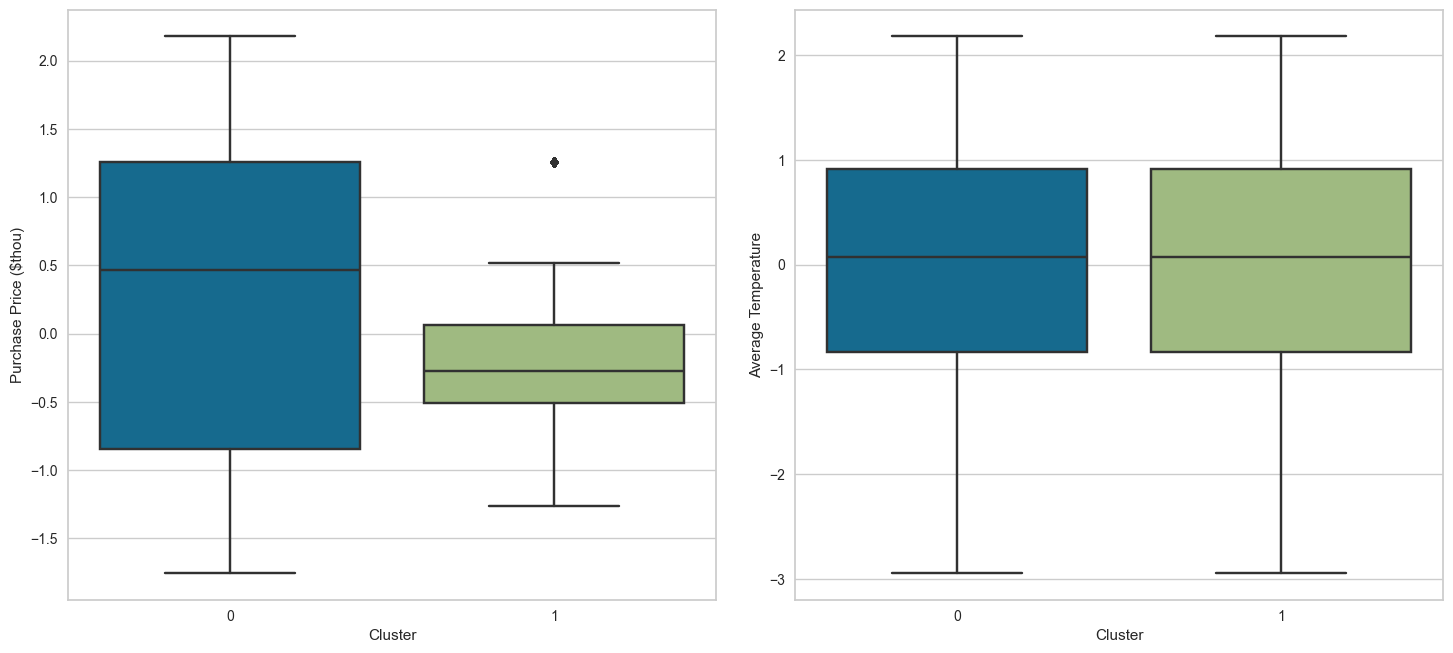

In [31]:
# visualize the clusters with purchase price and average temperature, two of our most interested features

#initalizing subplots
fig, ax = plt.subplots(1,2, figsize=(15,7))

#selecting interested features
cols = ['Purchase Price ($thou)','Average Temperature']

#plotting
for i in range(2):
    sns.boxplot(ax = ax[i], data= X_results, y = cols[i], x = 'labels_kmeans').set(xlabel = 'Cluster')

#showing the plot
plt.tight_layout(pad=2)
plt.show()

**Conclusions:** The KMeans model suggest that there are two natural clusters for our data. In 2018, average temperature is quite evenly distributed amongst the two clusters, but purchase price is condensed in one cluster more than the other. There are definitely patterns in our data that is worth exploring more.

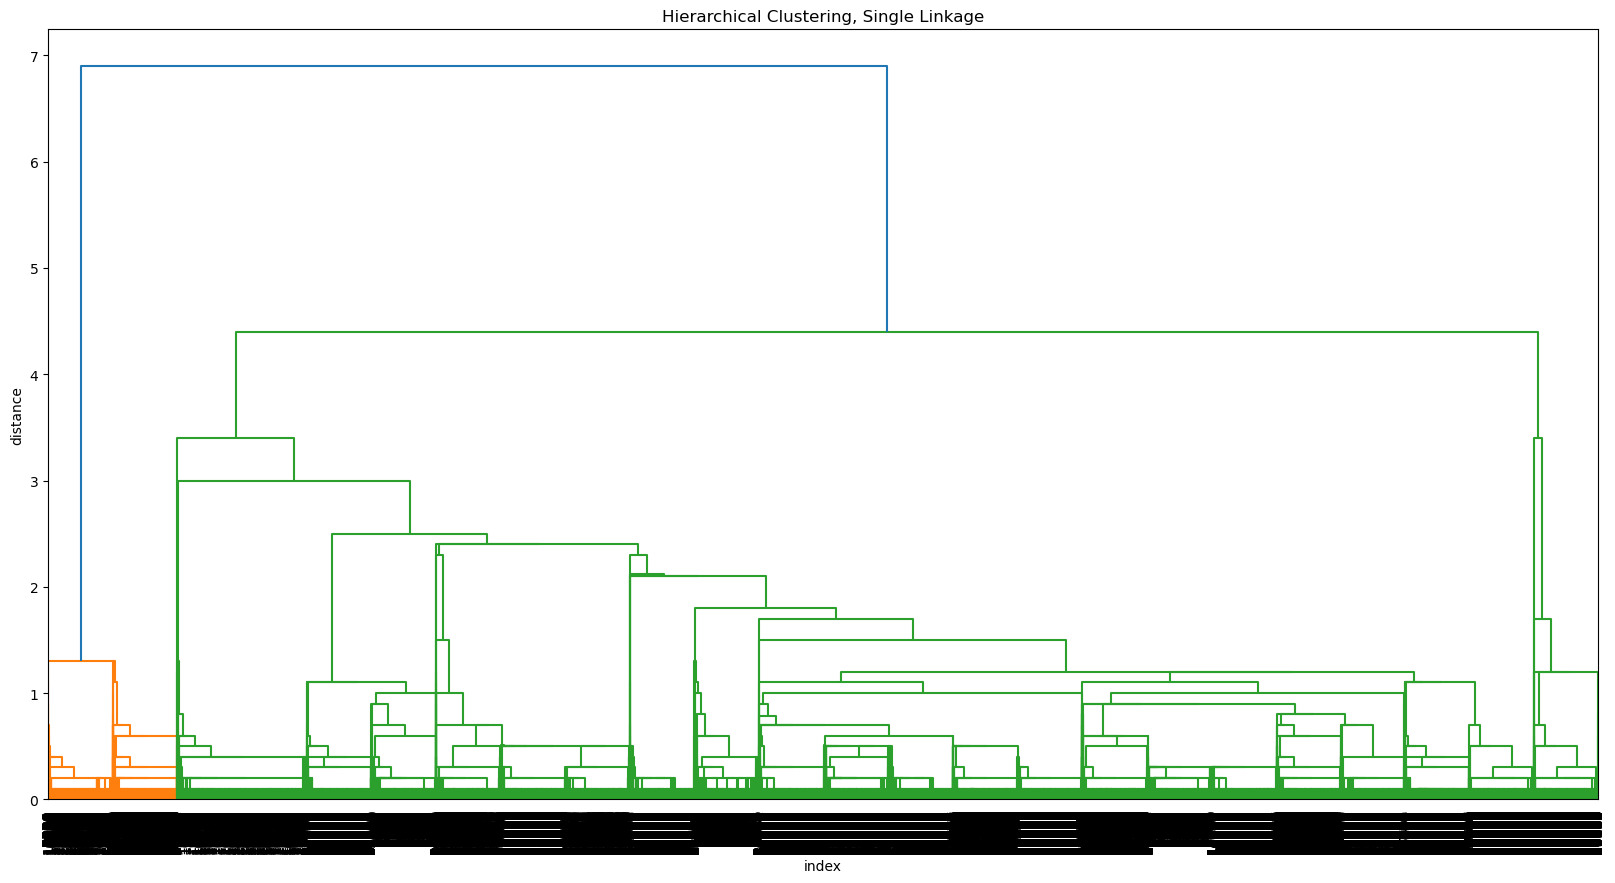

In [11]:
#The code below is reserved for sprint 5 (another model). Do not include in sprint 4 grading.

# plotting the dendogram

# style = ['single', 'average', 'complete', 'ward']

# for i in 
# avgl = linkage(X, i)
# plt.figure(figsize=(20,10))
# plt.grid(False)
# plt.title("Hierarchical Clustering, Single Linkage")
# plt.xlabel("index")
# plt.ylabel("distance")
# dendrogram(avgl,leaf_font_size=10);

## References:
1. Lab 9 codes
2. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
3. In-class exercises for KMeans